In [1]:
#autoreload so we can change the data without restarting kernel
%load_ext autoreload
%autoreload 2

from matplotlib import pyplot as plt
import numpy as np
from collections import OrderedDict
from PredictionData.ExamplePredictions import *
from Scripts.PlottingScripts import plot_matches, plot_ranking, plot_significance, plot_tournament_ranking, get_fig_crops
from Scripts.AnalysisScripts import calc_trysq, calc_trysq_weekly, calc_trysq_avg, calculate_average_prediction

from copy import deepcopy

# Tournament Tracking

In [2]:
# Collect up all of the game info for each week so we can do week-by-week and full tournament analysis
# Shape is: game_info["WeekX"] = [list_of_games_as_string_tuple,predictions_dict,final_score_dict] 
game_info = {}

# Week 1

In [3]:
#Reload the prediction so we don't have to restart the kernel every time the data changes...
from PredictionData.ExamplePredictions import predictions_wk1
week_number=1

calculate_average_prediction(predictions_wk1)
games = [("France","Ireland"),("Italy","England"),("Wales","Scotland")]

FinalScore = {
    ("France","Ireland"):(17,38),
    ("Italy","England"):(24,27),
    ("Wales","Scotland"):(26,27),
}
game_info["Week1"] = [games,predictions_wk1,FinalScore]
game_info["All"] = [deepcopy(games),deepcopy(predictions_wk1),deepcopy(FinalScore)]


In [4]:
predictions = predictions_wk1 #Pick the predictions
markers = player_markers #Pick the markers to use

### Score plot

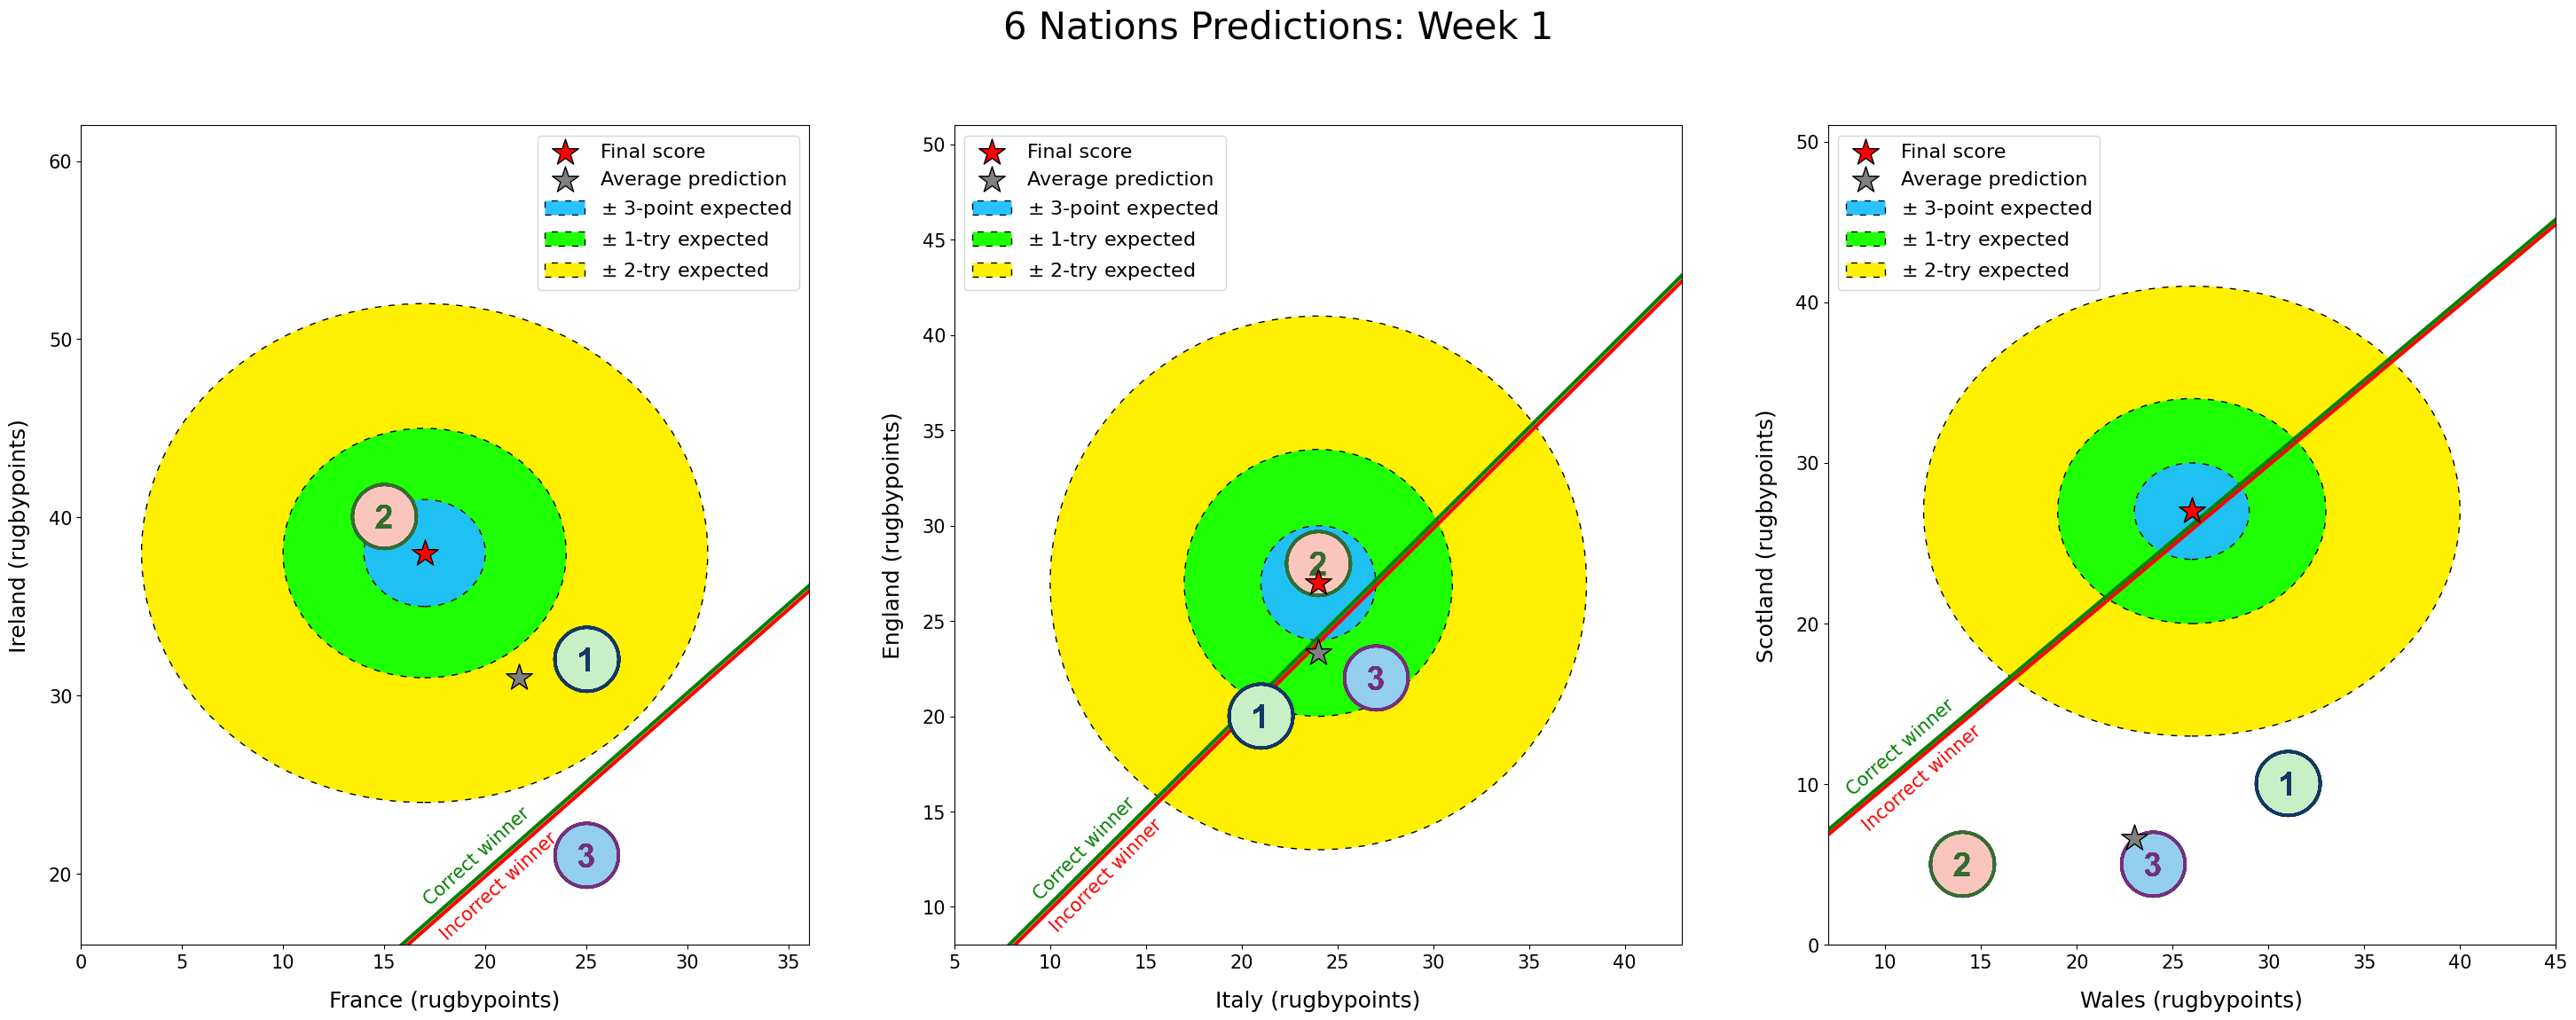

In [5]:
n_figs = 3
fig_x = 36
fig_y = 12

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x, fig_y)) #Make seperate axes for each game
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=True)

plot_matches(axs,games,predictions,markers,FinalScore=FinalScore,Nexpected=3,show_average=True,show_winloss=True)

plt.suptitle('6 Nations Predictions: Week {}'.format(week_number),size=30,y=0.99)
plt.show()
fig.savefig("Plots/Week{}/SixN_Week{}_AllGames_Example.png".format(week_number,week_number))

#Split multi-axis into individual games and save each separately
for i,ax in enumerate(axs):
    fig.savefig("Plots/Week{}/SixN_Week{}_Game{}_Example.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i])


### Ranking plot

Combined try^2: 
{'player3': 0.8134920634920635, 'player1': 0.7345068330362448, 'Average': 0.432273363891011, 'player2': 0.40990896358543416}


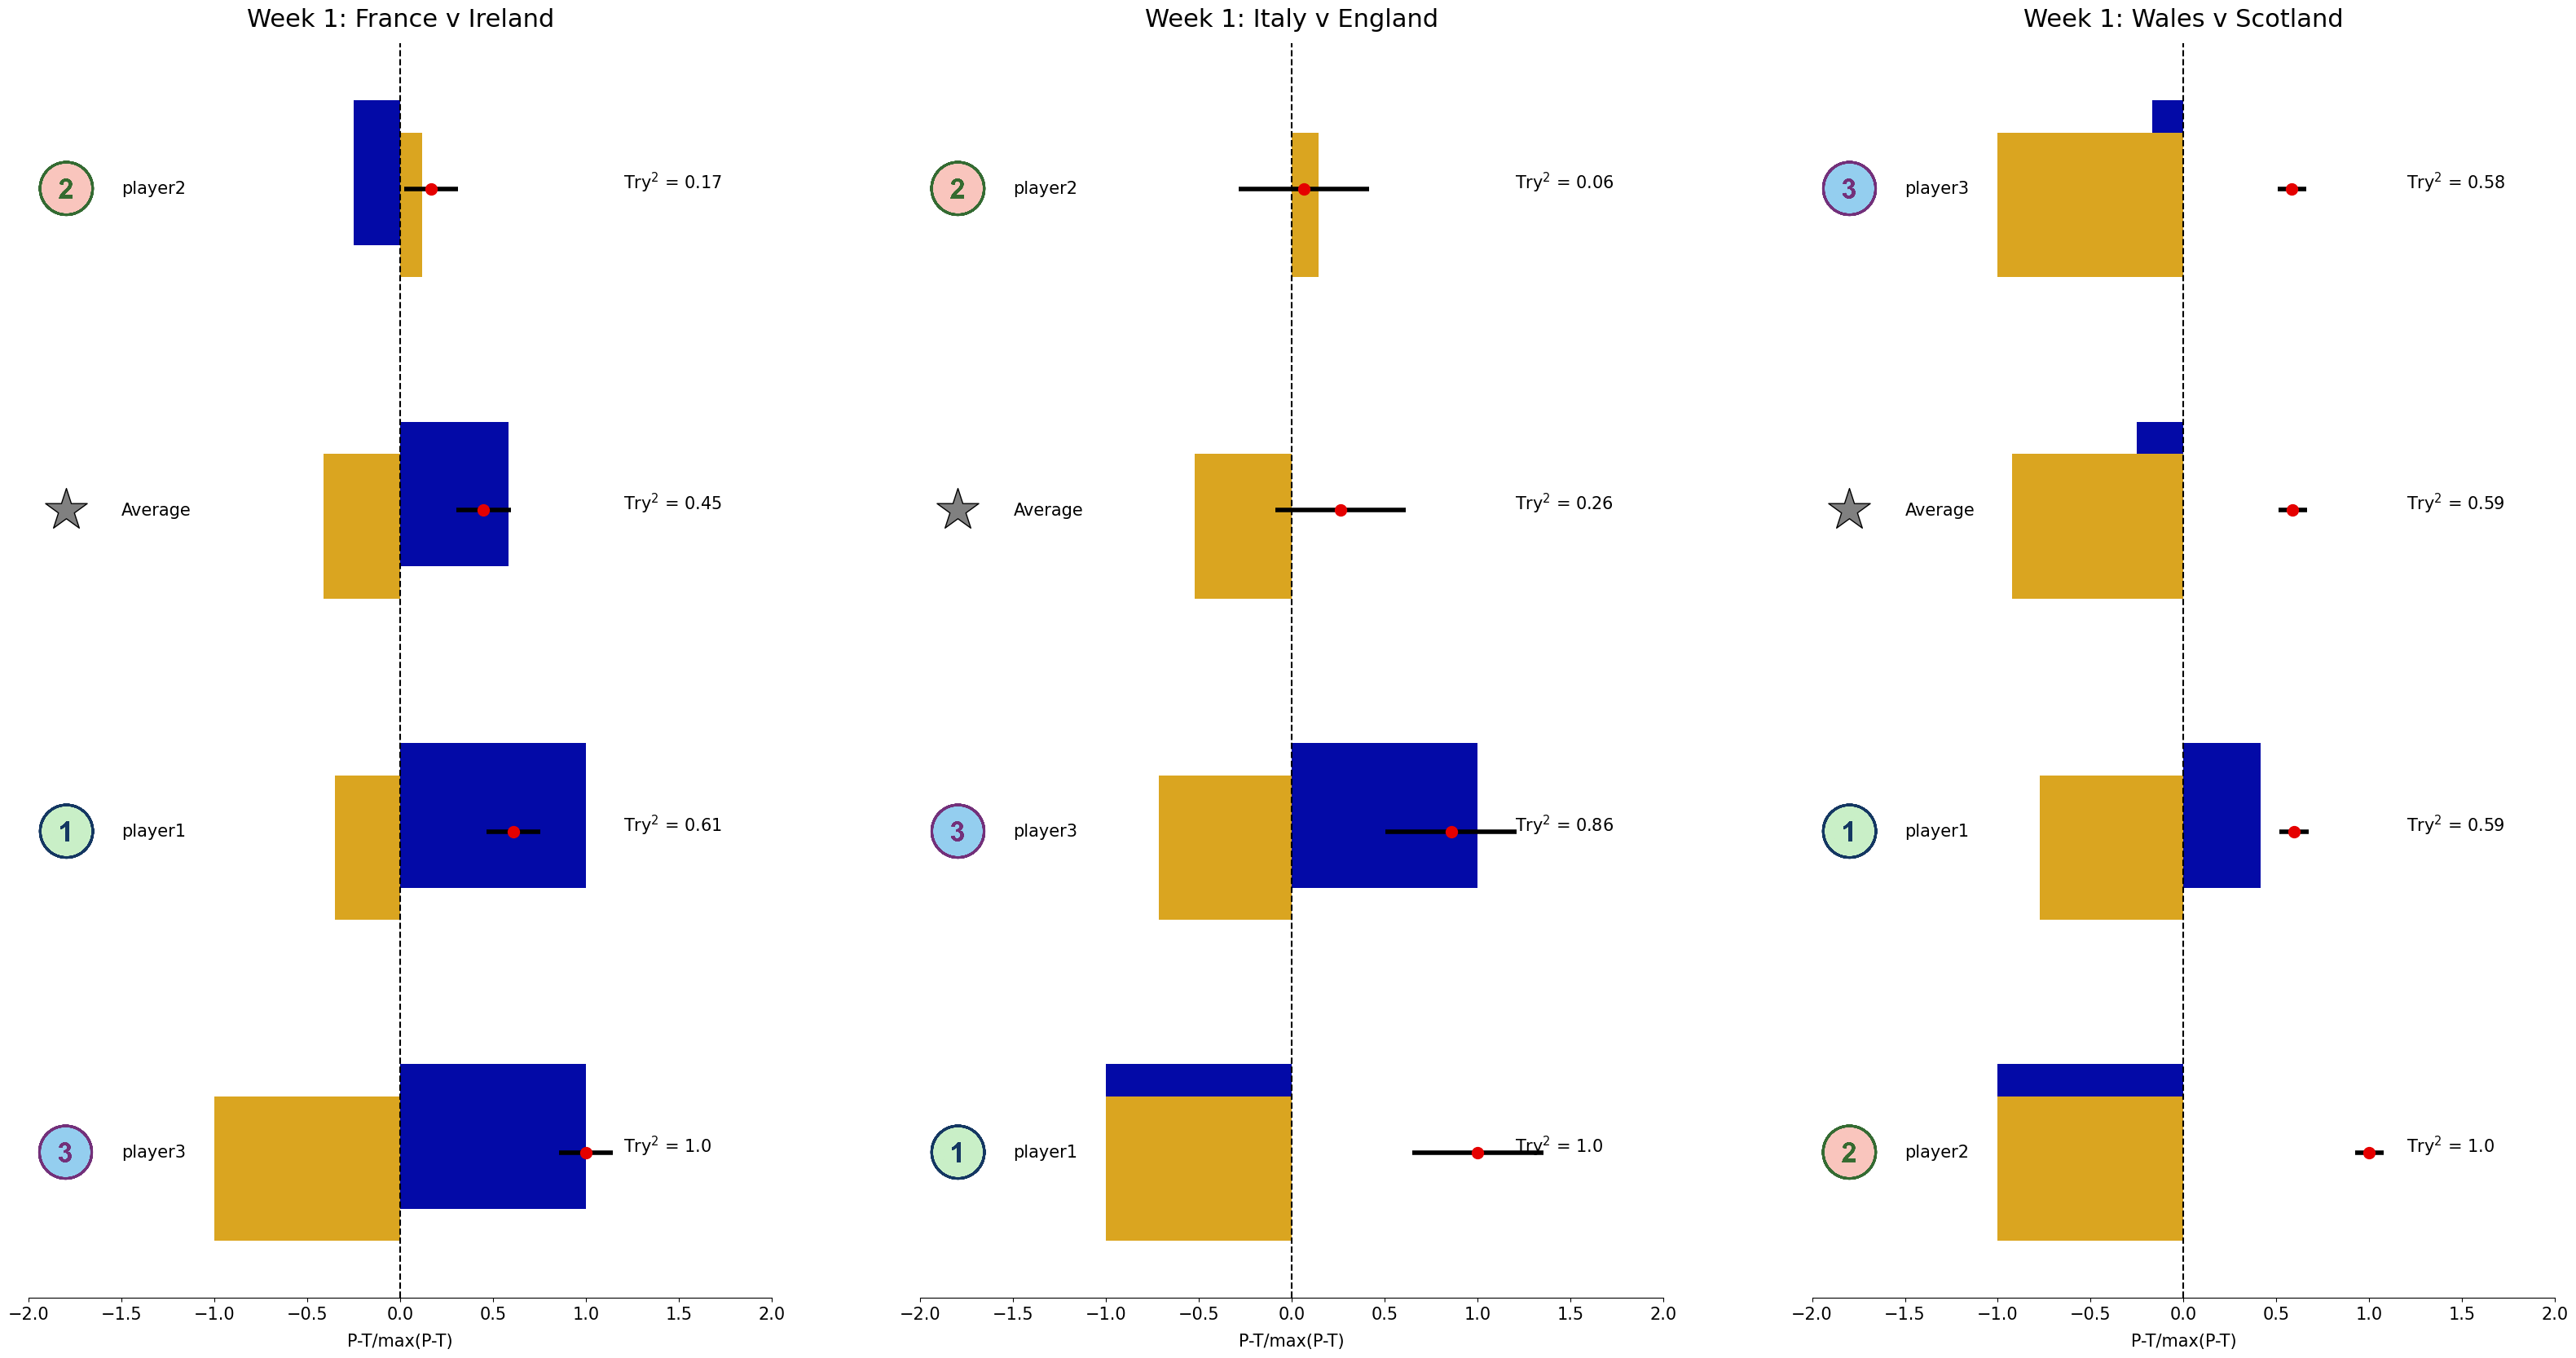

In [6]:
n_figs = 3
fig_x = 40
fig_y = 20

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=False)

plot_ranking(axs,games,predictions,markers,FinalScore,win_SF=0.9,week=week_number,draw_markers=True,show_average=True)
fig.savefig("Plots/Week{}/SixN_Week{}_Rankings_AllGames_Example.png".format(week_number,week_number))

for i,ax in enumerate(axs):
    fig.savefig("Plots/Week{}/SixN_Week{}_Rankings_Game{}_Example.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i])


# Week 2

In [7]:
#Reload the prediction so we don't have to restart the kernel every time the data changes...
from PredictionData.ExamplePredictions import predictions_wk2
week_number=2

calculate_average_prediction(predictions_wk2)
games = [("Scotland","France"),("England","Wales"),("Ireland","Italy")]
FinalScore = {
    ("Scotland","France"):(16,20),
    ("England","Wales"):(16,14),
    ("Ireland","Italy"):(36,0),
}
game_info["Week2"] = [games,predictions_wk2,FinalScore]

game_info["All"][0] += deepcopy(games)
for name, preds in deepcopy(predictions_wk2).items():
    if name in game_info["All"][1].keys():
        game_info["All"][1][name].update(preds)
    else:
        game_info["All"][1][name] = preds
game_info["All"][2].update(deepcopy(FinalScore))

In [8]:
predictions = predictions_wk2 #Pick the predictions
markers = player_markers #Pick the markers to use

### Score plot

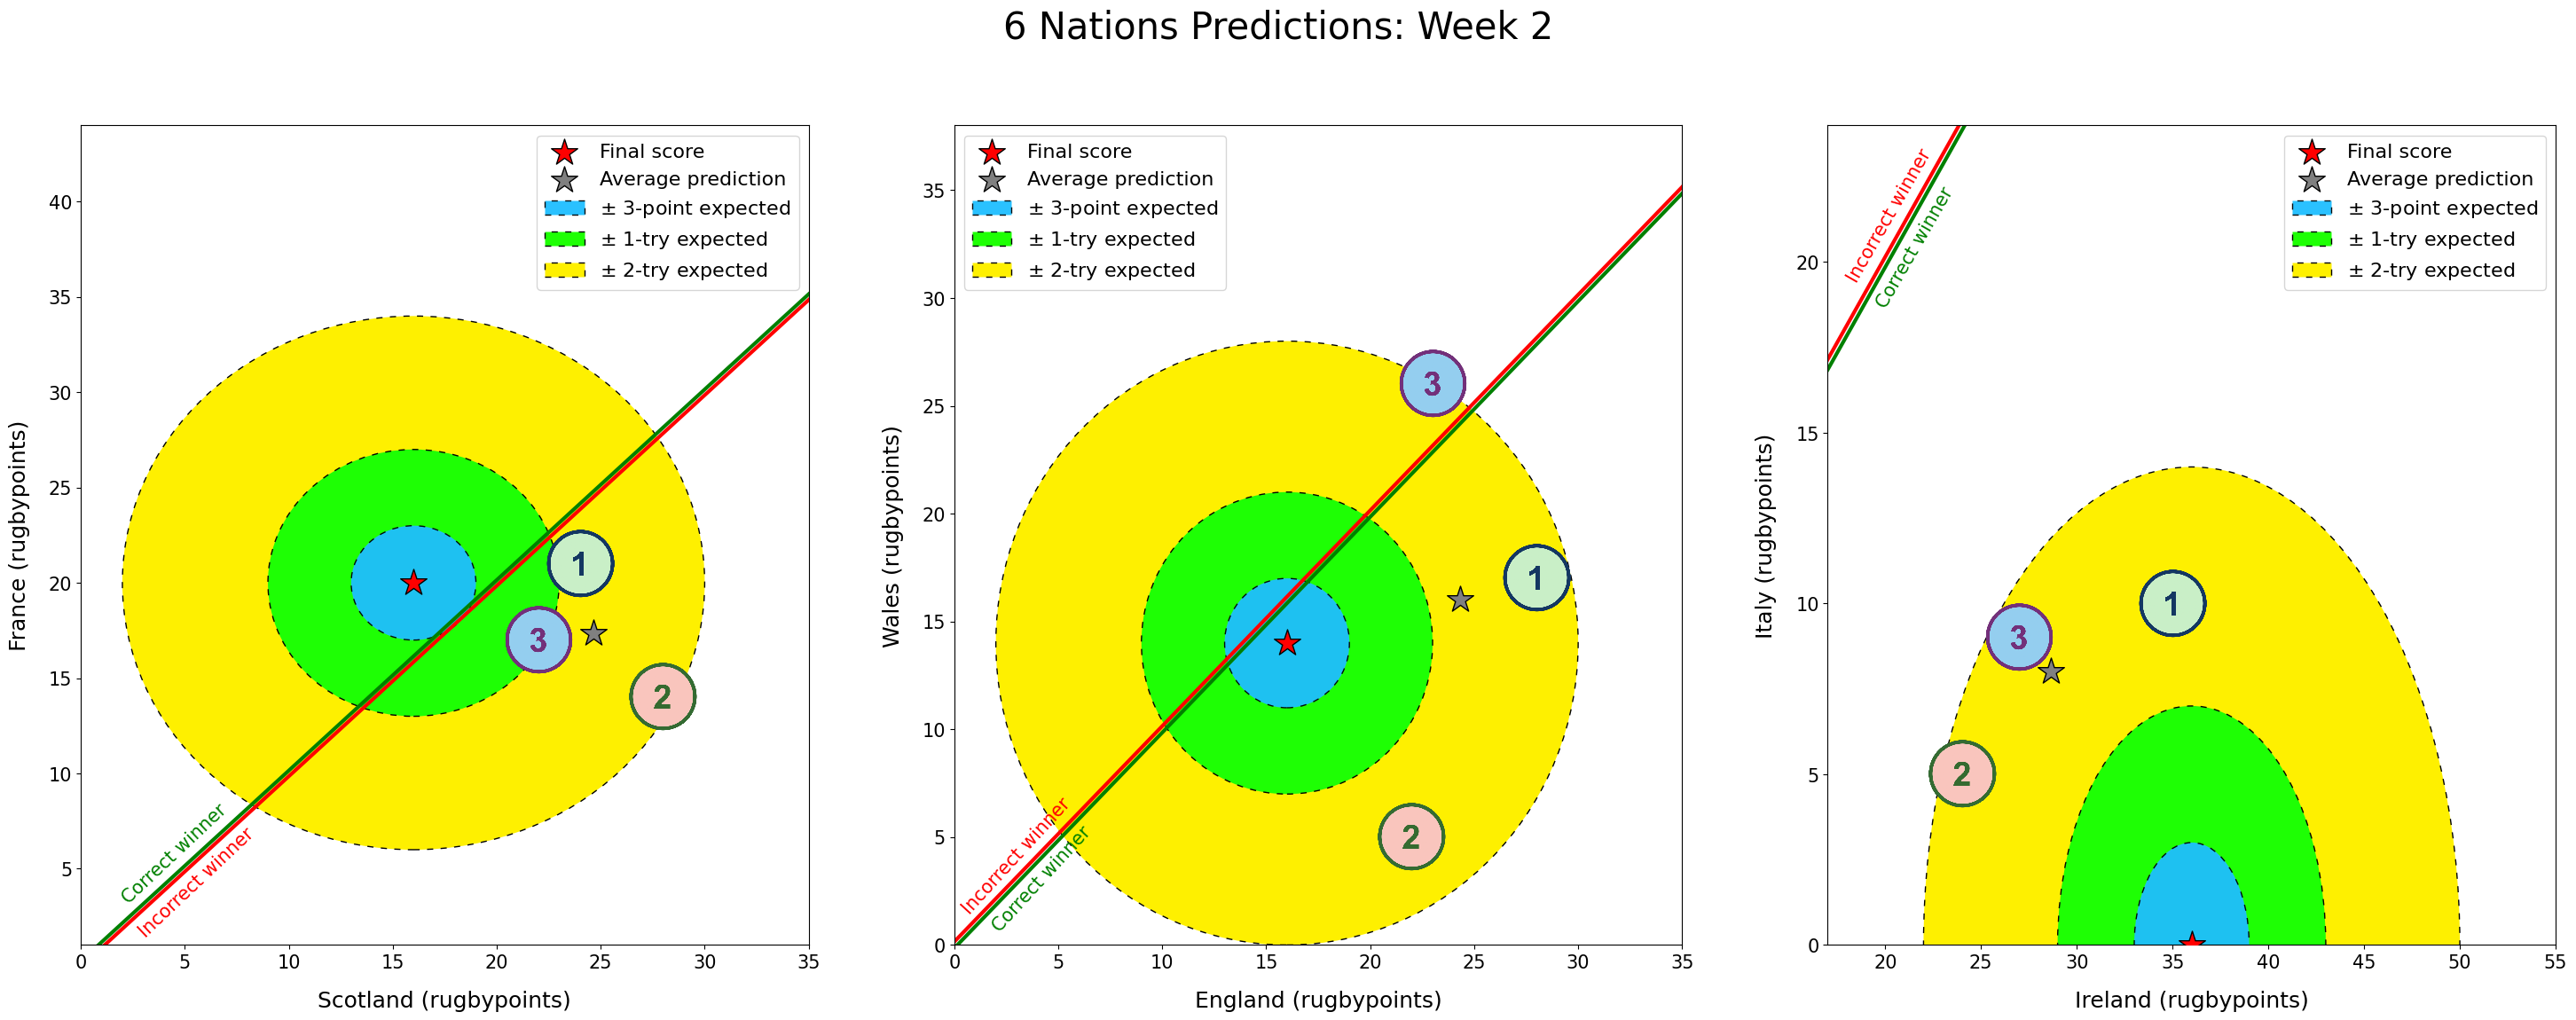

In [10]:
n_figs = 3
fig_x = 36
fig_y = 12

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x, fig_y)) #Make seperate axes for each game
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=True)

plot_matches(axs,games,predictions,markers,FinalScore=FinalScore,Nexpected=3,show_average=True,show_winloss=True)

plt.suptitle('6 Nations Predictions: Week {}'.format(week_number),size=30,y=0.99)
plt.show()
fig.savefig("Plots/Week{}/SixN_Week{}_AllGames_Example.png".format(week_number,week_number))

#Split multi-axis into individual games and save each separately
for i,ax in enumerate(axs):
    fig.savefig("Plots/Week{}/SixN_Week{}_Game{}_Example.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i])

### Ranking plot

Combined try^2: 
{'player2': 0.7458333333333332, 'player3': 0.6780555555555555, 'Average': 0.5352777777777779, 'player1': 0.4888888888888888}


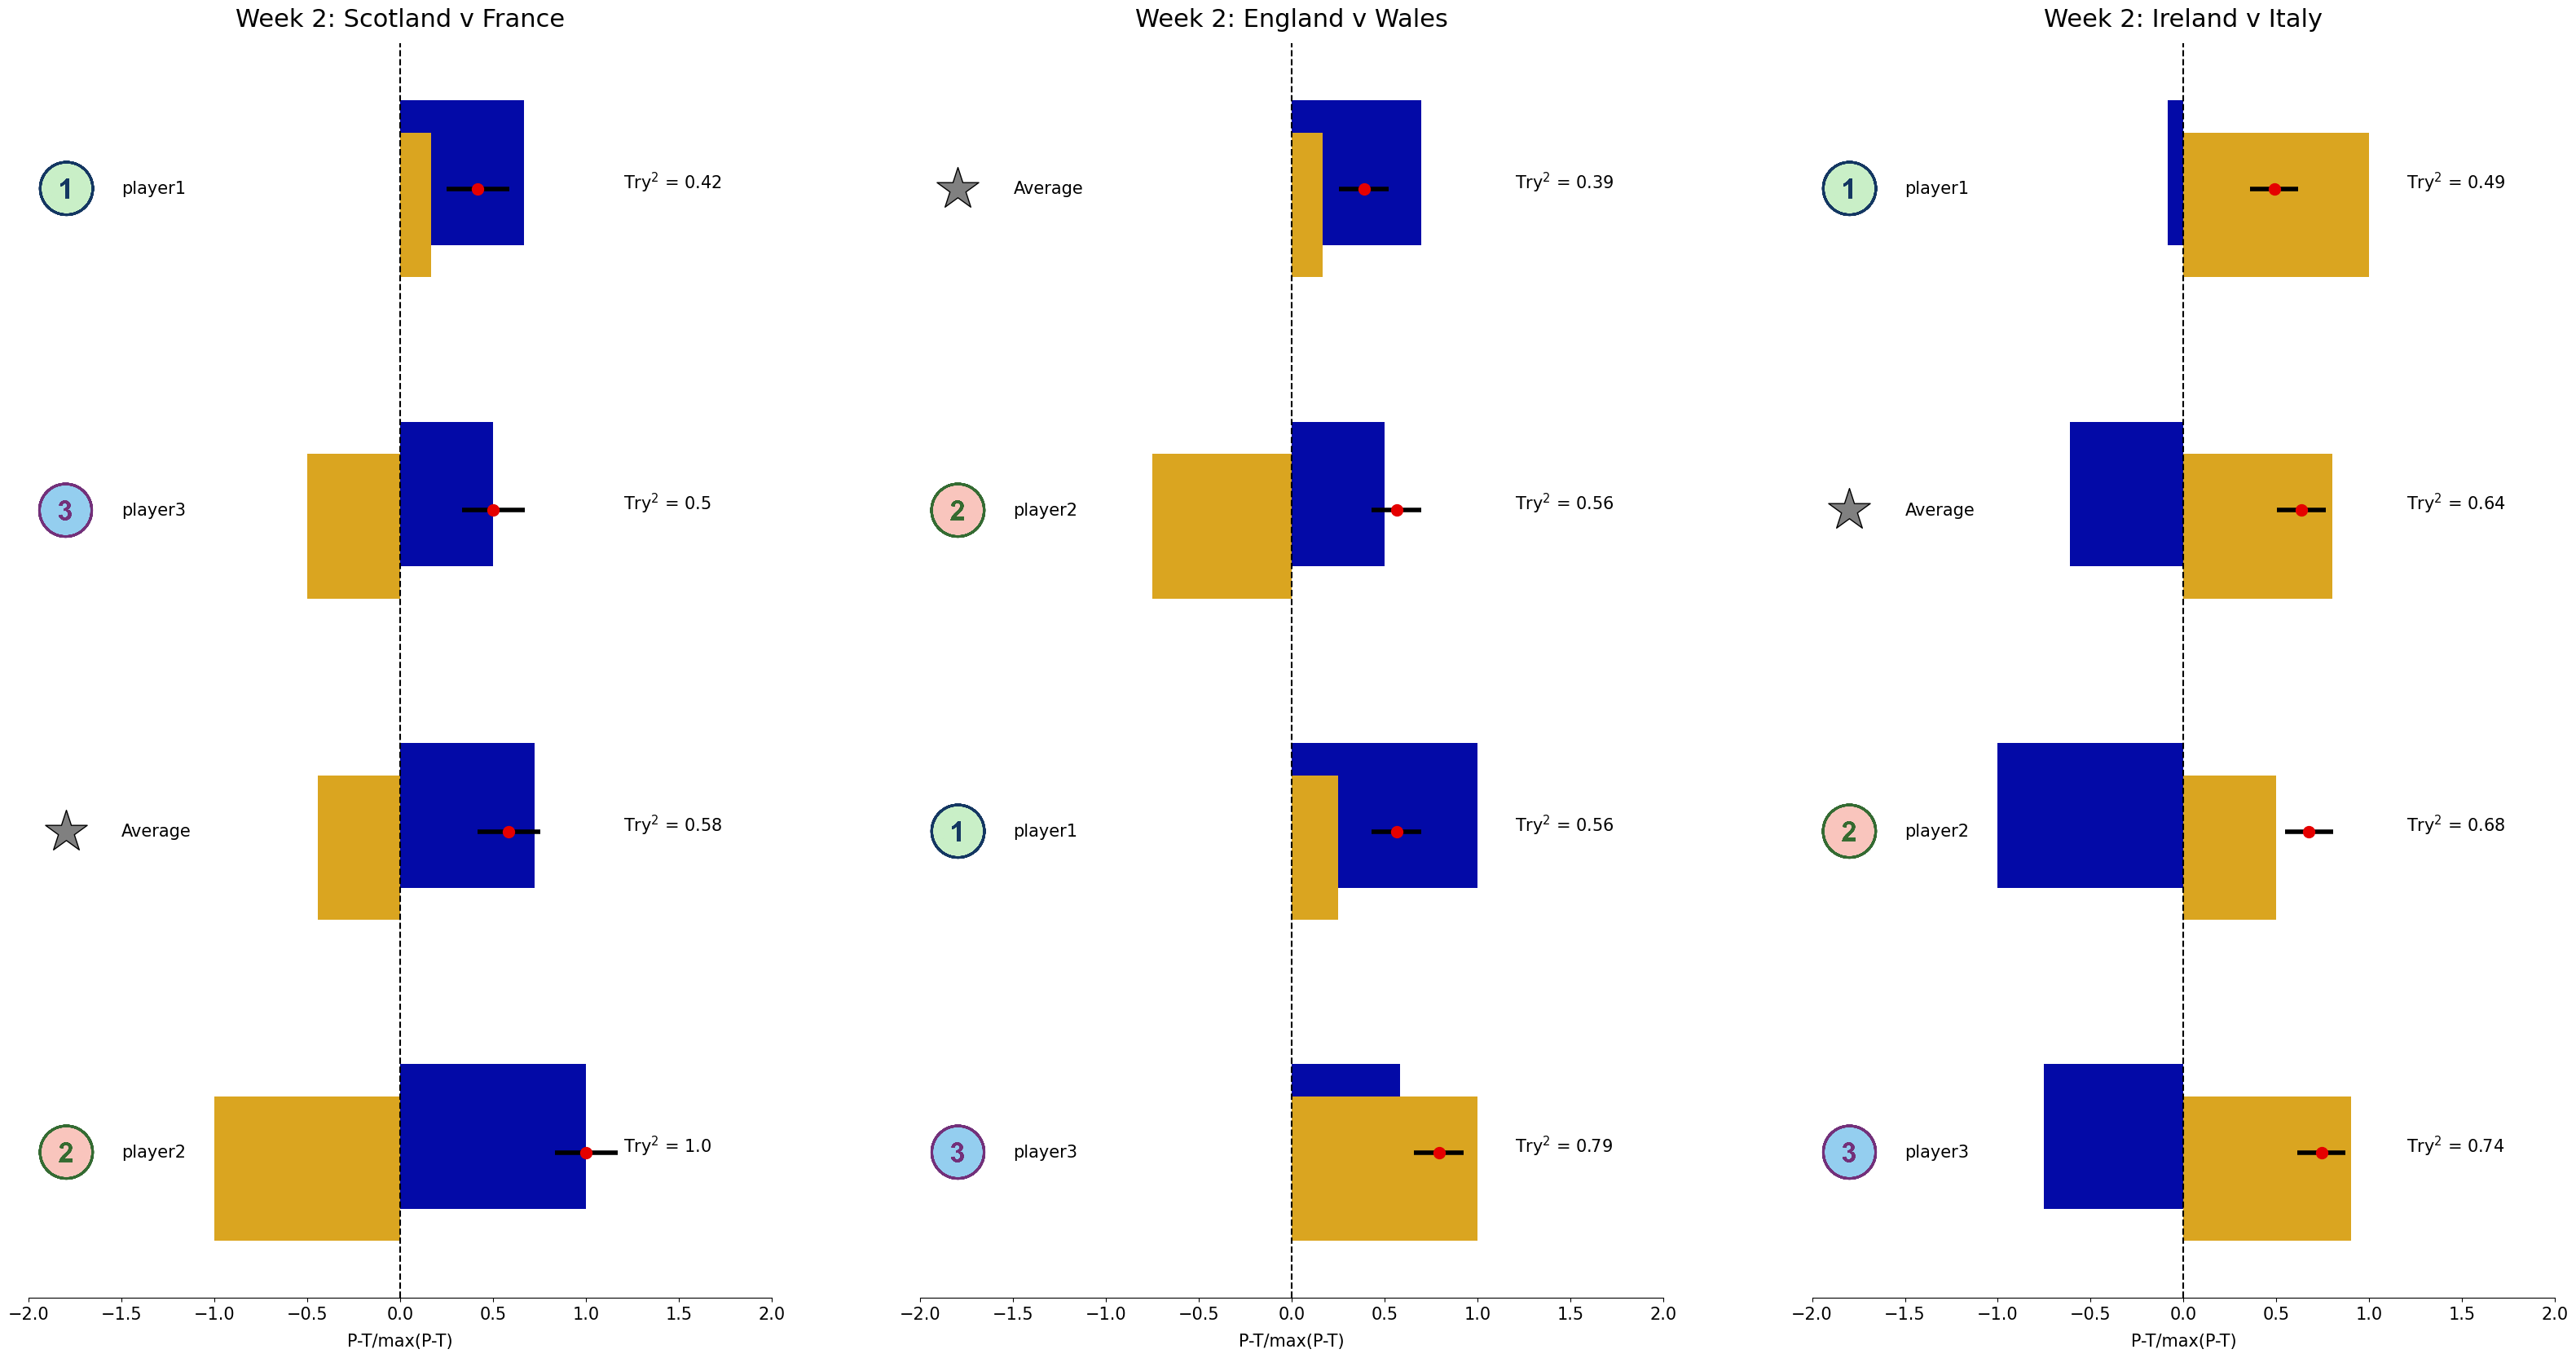

In [11]:
n_figs = 3
fig_x = 40
fig_y = 20

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=False)

plot_ranking(axs,games,predictions,markers,FinalScore,win_SF=0.9,week=week_number,draw_markers=True,show_average=True)
fig.savefig("Plots/Week{}/SixN_Week{}_Rankings_AllGames_Example.png".format(week_number,week_number))

for i,ax in enumerate(axs):
    fig.savefig("Plots/Week{}/SixN_Week{}_Rankings_Game{}_Example.png".format(week_number,week_number,str(i+1)), bbox_inches=custom_crops[i])

# Tournament Rankings

In [12]:
do_norm = False
weekly_rankings = calc_trysq_weekly(game_info,win_SF=0.9,do_norm=do_norm,do_var_err=True)
for week,info in weekly_rankings.items():
    print(week)
    print(weekly_rankings[week]["try_sq"])

Week1
{'player3': 9.5, 'player1': 7.433333333333334, 'player2': 6.416666666666667, 'Average': 6.25}
Week2
{'player2': 7.8, 'player3': 7.366666666666667, 'Average': 5.738888888888888, 'player1': 5.3999999999999995}
All
{'player3': 8.433333333333334, 'player2': 7.108333333333333, 'player1': 6.416666666666667, 'Average': 5.9944444444444445}


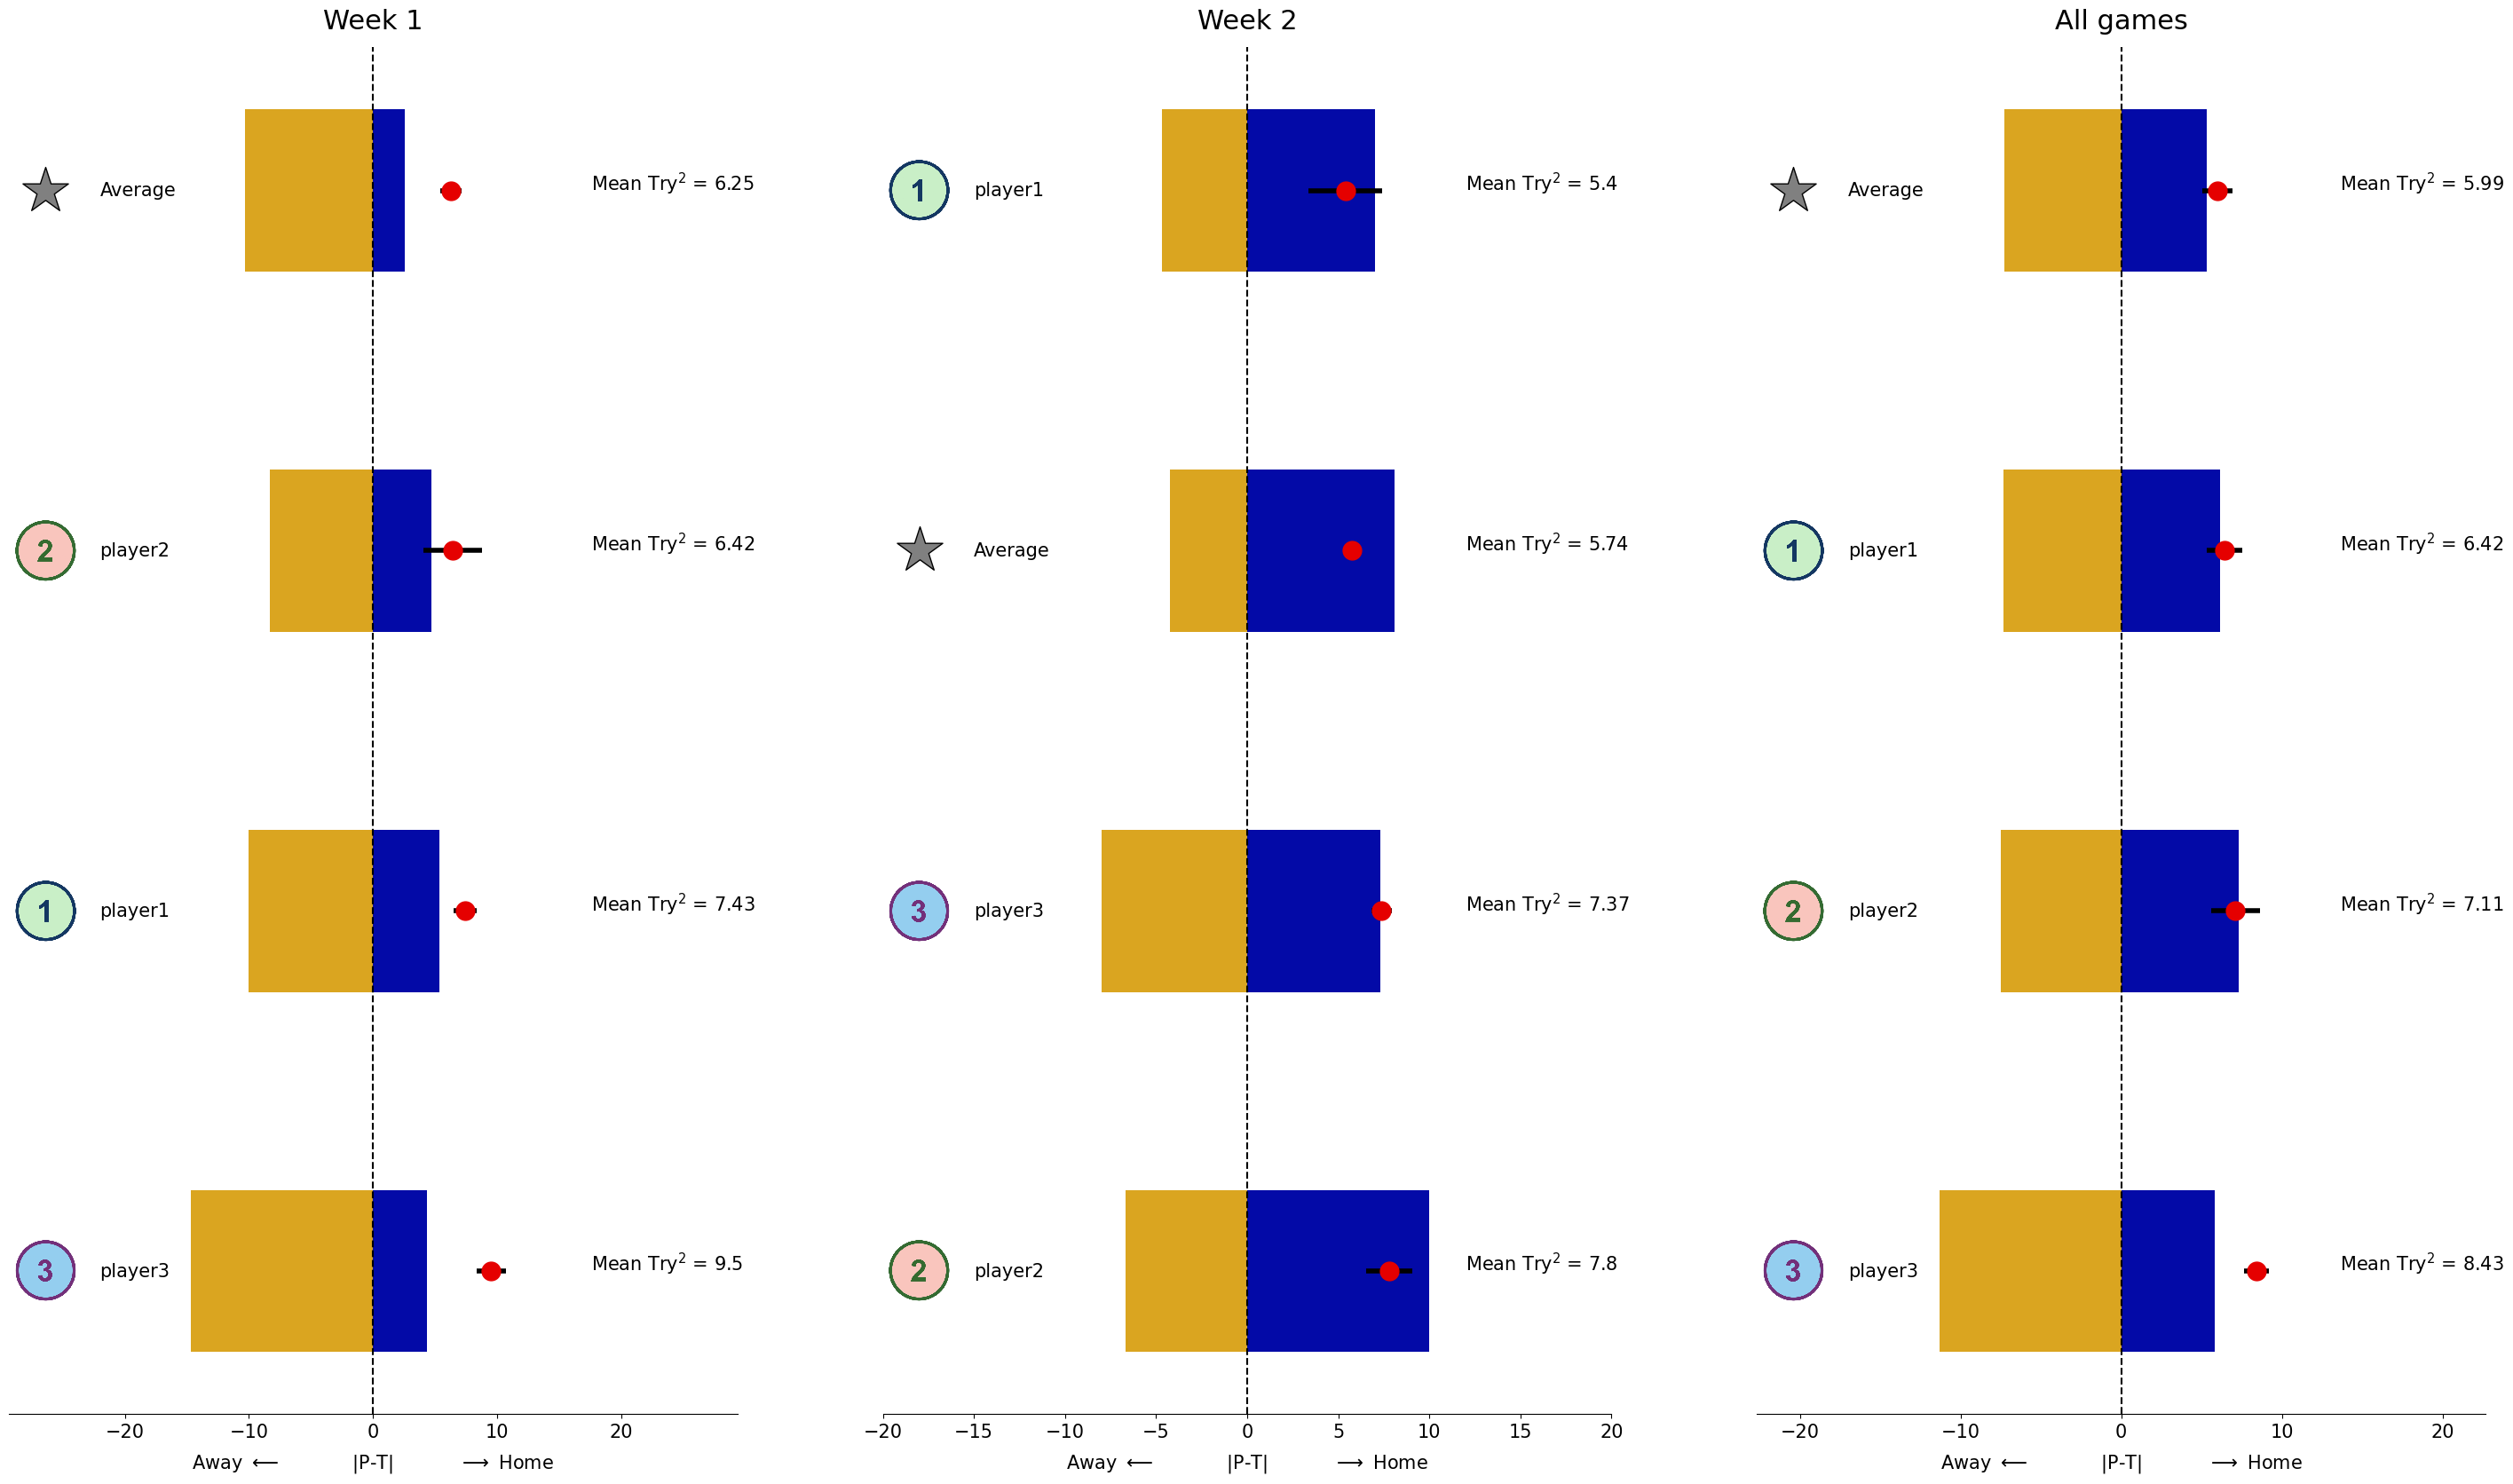

In [14]:
n_weeks = 2
n_figs = n_weeks+1
fig_x = n_figs*12
fig_y = 20

fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=False)

plot_tournament_ranking(axs,weekly_rankings,markers,draw_markers=True,show_average=True,do_norm=False)
fig.savefig("Plots/TournamentRanking/SixN_Tournament_Rankings_Example.png")

for i,ax in enumerate(axs):
    if i<n_weeks: 
        fig.savefig("Plots/TournamentRanking/SixN_Tournament_Rankings_Week"+str(i+1)+"_Example.png", bbox_inches=custom_crops[i])
    else:
        fig.savefig("Plots/TournamentRanking/SixN_Tournament_Rankings_AllGames_Example.png", bbox_inches=custom_crops[i])

# Significance

In [15]:
# Make N random guesses for each game for each week
# Order toys and predictions and join together
# Calculate the Try^2 for all predictions and all toys
# Pull out only the toys and take the mean
rng = np.random.default_rng()
n_toys = 5000
guesses = {}
toys = {}
try_sq = {}
errors = {}
mean_avg_toy = {}
one_sigma = {}
two_sigma = {}
three_sigma = {}
do_norm = True
game_info = dict(sorted(game_info.items(), key=lambda wk:wk[0][-1]))


for week,info in game_info.items():
    guesses[week] = {}
    toys[week] = {}
    games = info[0]
    predictions = info[1]
    FinalScore = info[2]
    for game in games:
        guesses1 = rng.integers(low=0, high=50, size=n_toys)
        guesses2 = rng.integers(low=0, high=50, size=n_toys)
        guesses[week][game] = list(zip(guesses1,guesses2))

    for x in range(n_toys):
        toys[week][x] = {}
        for game in games:
            toys[week][x][game] = guesses[week][game][x]


    ordered_predictions = OrderedDict(predictions)
    ordered_toys = OrderedDict(toys[week])
    ordered_predictions.update(toys[week])
    
    avg_try_sq = calc_trysq_avg(ordered_predictions,FinalScore,win_SF=0.9,do_norm=do_norm,do_var_err=True)
    try_sq[week] = avg_try_sq["try_sq"]
    errors[week] = avg_try_sq["error"]

    combined_toys = []
    for x in range(n_toys):
        combined_toys.append(try_sq[week][x])
    mean_avg_toy[week] = np.mean(combined_toys)
    print("Mean Try^2 for {}: {}".format(week,mean_avg_toy[week]))

    found1s = False
    found2s = False
    found3s = False
    for x in np.linspace(0.0, mean_avg_toy[week], num=1000):
        p_outside_below = np.argwhere(combined_toys < x).shape[0]
        if do_norm:
            p_outside_above= np.argwhere(combined_toys > 1.0-x).shape[0]
        else:
            p_outside_above= np.argwhere(combined_toys > np.max(combined_toys)-x).shape[0]
        inverted_sigma = (p_outside_below + p_outside_above)/len(combined_toys)
        if found3s == False and inverted_sigma > 1-0.997:
            print("{}: 3-sigma value = {}".format(week,x))
            three_sigma[week] = x
            found3s = True
        if found2s == False and inverted_sigma > 1-0.95:
            print("{}: 2-sigma value = {}".format(week,x))
            two_sigma[week] = x
            found2s = True
        if found1s == False and inverted_sigma > 1-0.68:
            print("{}: 1-sigma value = {}".format(week,x))
            one_sigma[week] = x
            found1s = True
            break

Mean Try^2 for Week1: 0.518896081081081
Week1: 3-sigma value = 0.09505303587371153
Week1: 2-sigma value = 0.2207515860455049
Week1: 1-sigma value = 0.35683844614885146
Mean Try^2 for Week2: 0.5294249275362319
Week2: 3-sigma value = 0.06094481147814481
Week2: 2-sigma value = 0.2035026748487618
Week2: 1-sigma value = 0.34977022239630934
Mean Try^2 for All: 0.5301910438347525
All: 3-sigma value = 0.1777917914761182
All: 2-sigma value = 0.2924276928457944
All: 1-sigma value = 0.3943262718410621


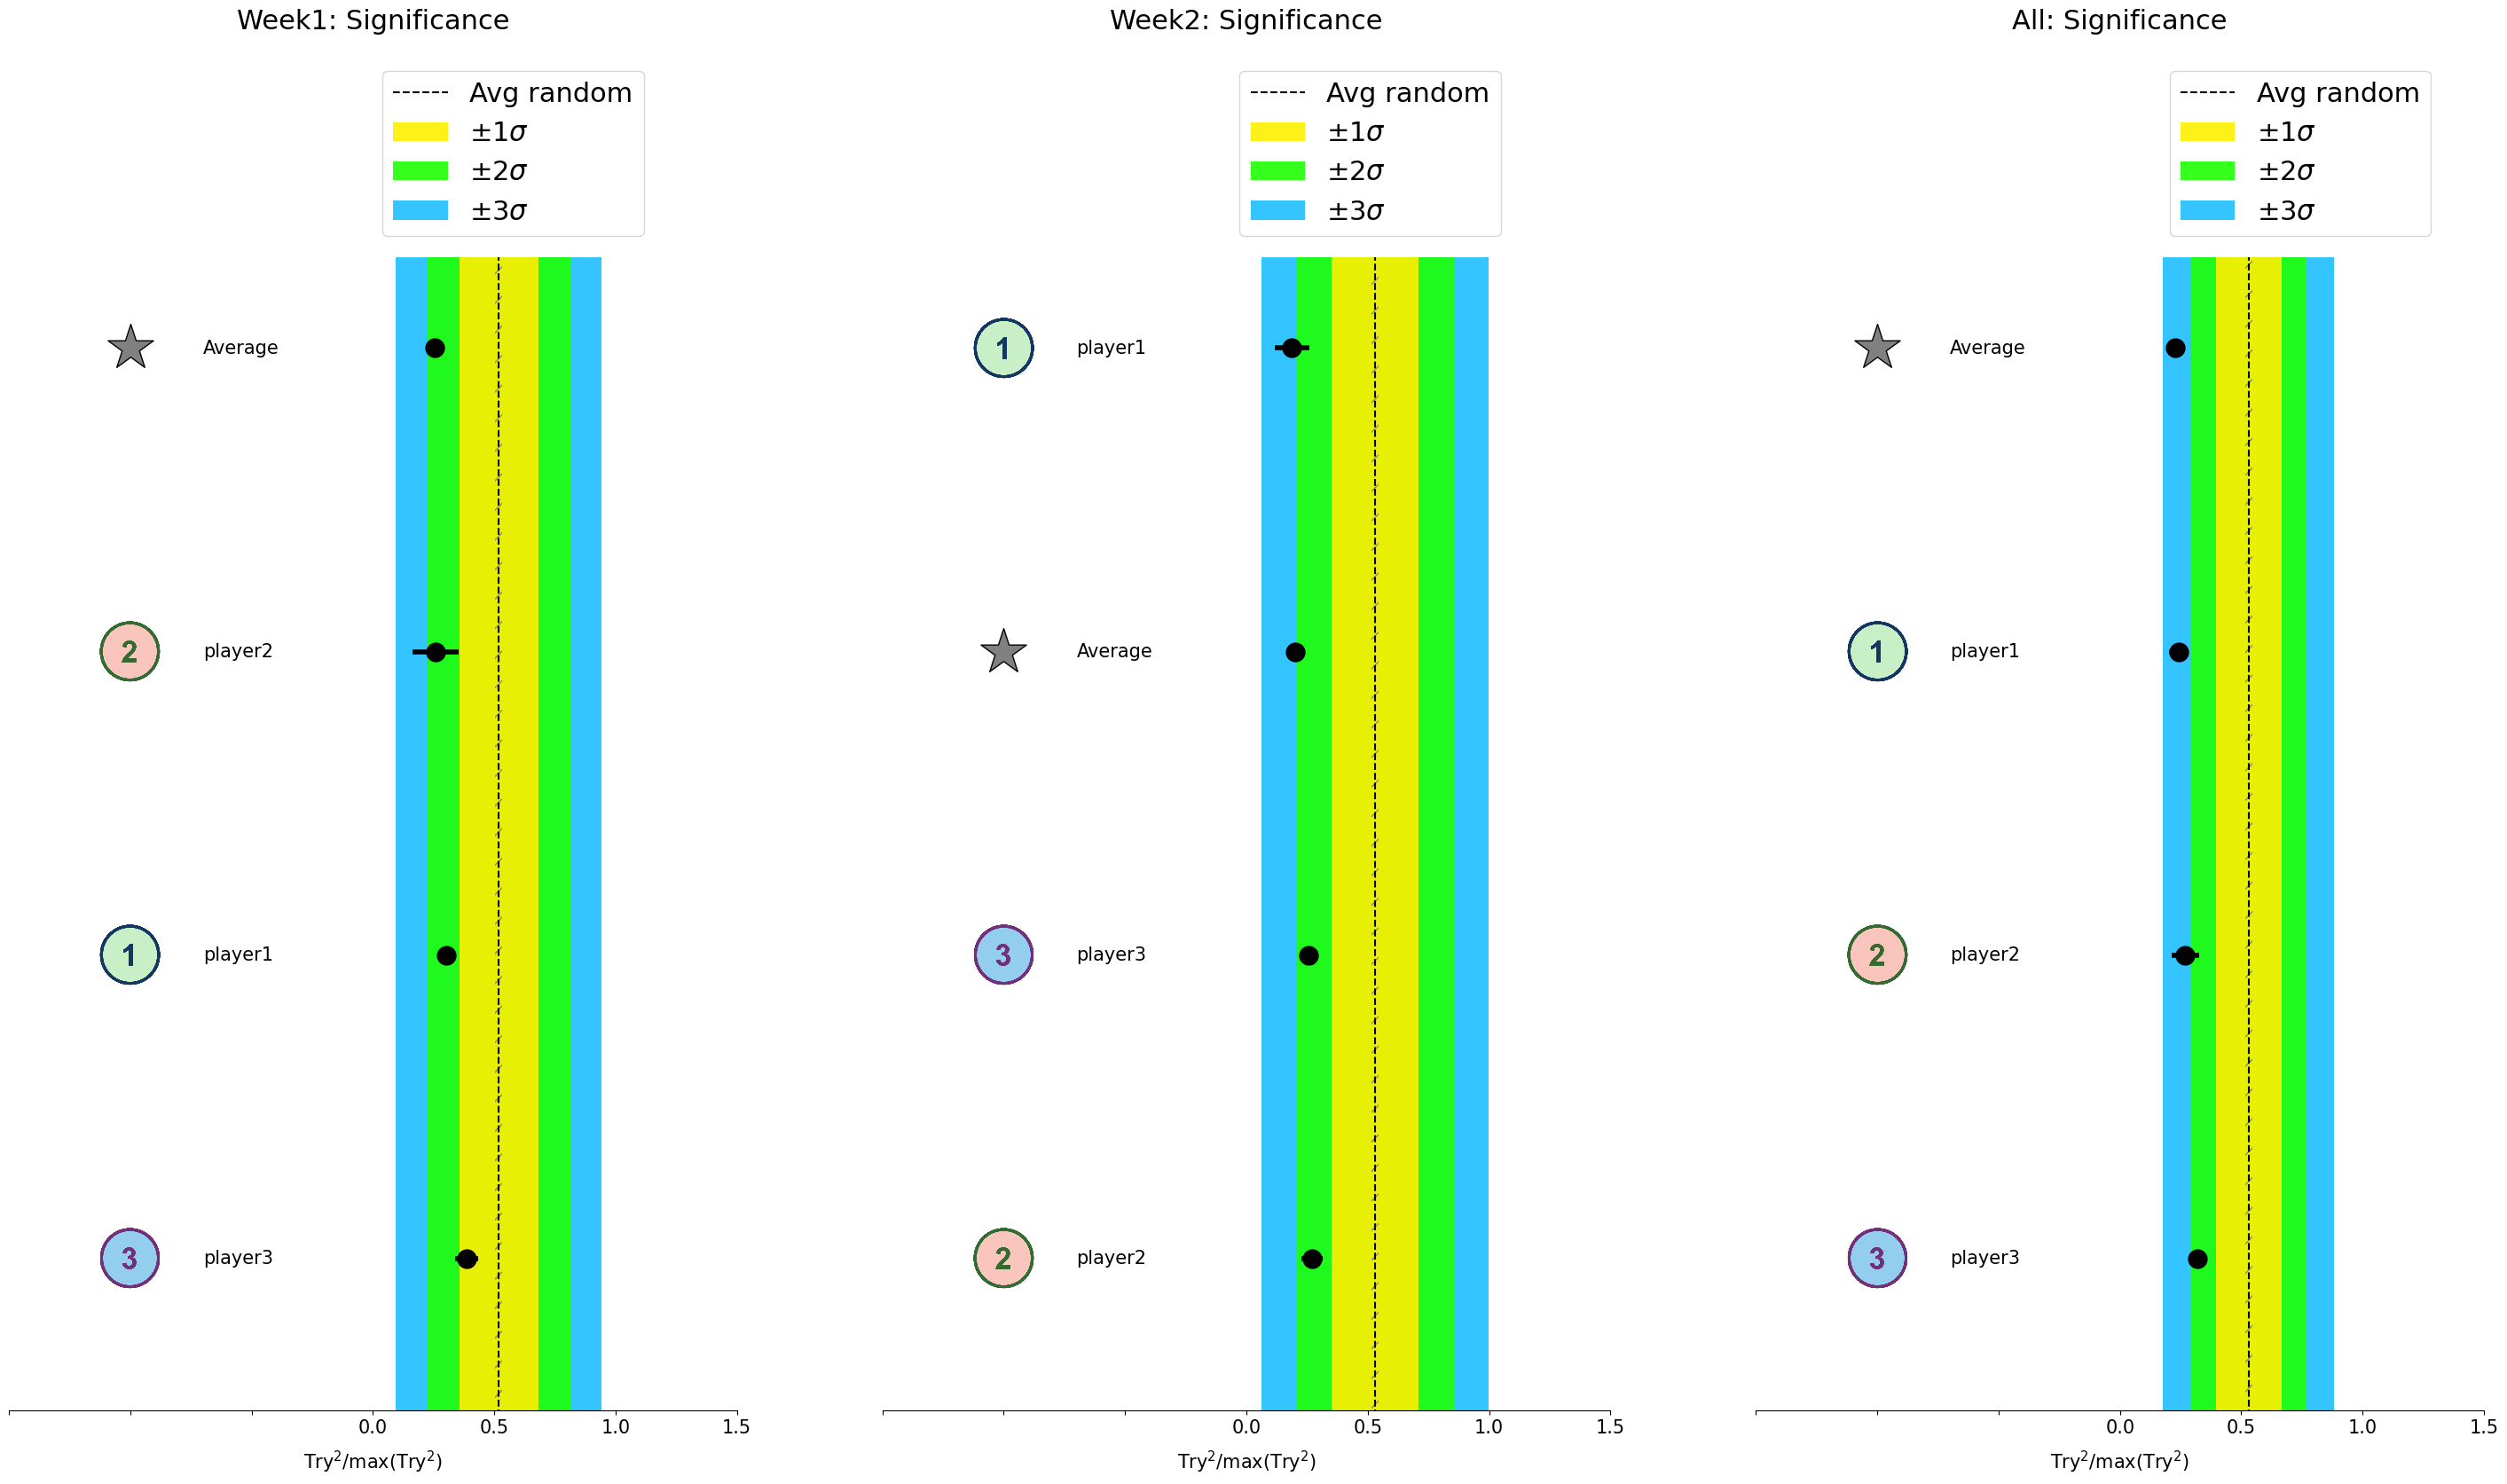

In [16]:
sigmas = [one_sigma,two_sigma,three_sigma]
markers = player_markers #Pick the markers to use

n_weeks = 2
n_figs = n_weeks+1
fig_x = n_figs*12
fig_y = 20
fig, axs = plt.subplots(1,n_figs,figsize=(fig_x,fig_y))
custom_crops = get_fig_crops(n_figs,fig_x,fig_y,x_label=True,y_label=False)
plot_significance(axs,n_toys,game_info,try_sq,errors,mean_avg_toy,sigmas,markers,draw_markers=True,show_average=True,do_norm=do_norm,bottom_pad=0.5,top_pad=0.3,title_pad=2.5)
fig.savefig("Plots/StatSignificance/SixN_StatSignificance_AllWeeks_Example.png")
for i,ax in enumerate(axs):
    if i < n_weeks:
        fig.savefig("Plots/StatSignificance/SixN_StatSignificance_Week"+str(i+1)+"_Example.png", bbox_inches=custom_crops[i])
    else:
        fig.savefig("Plots/StatSignificance/SixN_StatSignificance_All_Example.png", bbox_inches=custom_crops[i])
